# Reading your data

In [0]:
import pandas as pd
data = pd.read_csv("./flipkart_data.csv")
data.shape

(266242, 6)

In [0]:
# data frame looks like this
data.head(3)

,product_description,meta_description,description,bread_crumb,highlights,formated_reviews
0,NaN,"Buy Moto G5s (Lunar Gray, 32 GB) online at bes...",NaN,Home > Mobiles & Accessories > Mobiles > Motor...,[],"['Nice Good but over priced', 'Absolute rubbis..."
1,NaN,Buy Imported ShengShow Gold Mirror Rubik Magic...,Very Good Fantastic Product. No compromise on ...,Home > Toys > Puzzles & Board Games > Puzzles ...,[],"['Really Nice Smooth', 'Excellent It is a good..."
2,A revolutionary camera that adapts like the hu...,"Buy Samsung Galaxy S9 (Midnight Black, 128 GB)...",Galaxy S9 Sleek and stunning the latest flagsh...,Home > Mobiles & Accessories > Mobiles > Samsu...,[],"['Must buy! Just woww', 'Fakruddin Nice Produc..."


In [0]:
# let's say if i want to see the data present in 43rd row --> iloc
data.iloc[43] 

product_description    A blend of innovative design and technology - ...
meta_description       Buy Samsung Galaxy S9 Plus (Coral Blue, 128 GB...
description            Galaxy S9+ Sleek and stunning the latest flags...
bread_crumb            Home > Mobiles & Accessories > Mobiles > Samsu...
highlights                                                            []
formated_reviews       ['Worth every penny good phone', 'Must buy! Ti...
Name: 43, dtype: object

In [0]:
# if you are only interested in 'product_description' of 43rd row
data.iloc[43]['product_description']

'A blend of innovative design and technology - the Samsung Galaxy S9+ is powered by an octa-core processor, which runs all its innovative features seamlessly. A brilliant camera and nifty features such as augmented reality, Super Slow-mo, and Live Translation will revolutionise the way you’ve been using a smartphone. The cherry on the top is that it can be charged wirelessly.'

In [0]:
# if you are interested in the type 'product_description' of 43rd row
type(data.iloc[43]['product_description'])

str

In [0]:
print("Type of column ***product_description** ",type(data.iloc[43]['product_description']))
print("Type of column ***meta_description**    ",type(data.iloc[43]['meta_description']))
print("Type of column ***description**         ",type(data.iloc[43]['description']))
print("Type of column ***bread_crumb**         ",type(data.iloc[43]['bread_crumb']))
print("Type of column ***highlights**          ",type(data.iloc[43]['highlights']))
print("Type of column ***formated_reviews**    ",type(data.iloc[43]['formated_reviews']))

Type of column ***product_description**  <class 'str'>
Type of column ***meta_description**     <class 'str'>
Type of column ***description**          <class 'str'>
Type of column ***bread_crumb**          <class 'str'>
Type of column ***highlights**           <class 'str'>
Type of column ***formated_reviews**     <class 'str'>


In [0]:
import ast
dtypes = {'product_description': 'str', 
          'meta_description': 'str', 
          'description': 'str', 
          'bread_crumb': 'str'}
converters_ = {
          'highlights':ast.literal_eval,
          'formated_reviews':ast.literal_eval}

In [0]:
data = pd.read_csv("./flipkart_data.csv",dtype=dtypes,converters=converters_)

In [0]:
print("Type of column ***product_description** ",type(data.iloc[43]['product_description']))
print("Type of column ***meta_description**    ",type(data.iloc[43]['meta_description']))
print("Type of column ***description**         ",type(data.iloc[43]['description']))
print("Type of column ***bread_crumb**         ",type(data.iloc[43]['bread_crumb']))
print("Type of column ***highlights**          ",type(data.iloc[43]['highlights']))
print("Type of column ***formated_reviews**    ",type(data.iloc[43]['formated_reviews']))

Type of column ***product_description**  <class 'str'>
Type of column ***meta_description**     <class 'str'>
Type of column ***description**          <class 'str'>
Type of column ***bread_crumb**          <class 'str'>
Type of column ***highlights**           <class 'list'>
Type of column ***formated_reviews**     <class 'list'>


# Demo

In [0]:
"['this is good','this is awesome', 'a']"

"['this is good','this is awesome', 'a']"

In [0]:
type("['this is good','this is awesome', 'a']")

str

In [0]:
type(ast.literal_eval("['this is good','this is awesome','a']"))

list

In [0]:
ast.literal_eval("['this is good','this is awesome','a']")

['this is good', 'this is awesome', 'a']

In [0]:
['this is good', 'this is awesome']

['this is good', 'this is awesome']

In [0]:
 ' '.join(['this is good', 'this is awesome'])

'this is good this is awesome'

# Removing outliers

In [0]:
import numpy as np
type(np.NAN)

float

In [0]:
# Replacing NANs with empty string, which will help us to identify outliers
# Once we identify outliers and remove them then we will deal with empty strings/missing data
data = data.replace(np.NAN,'')

In [0]:
data.head(3)

,product_description,meta_description,description,bread_crumb,highlights,formated_reviews
0,,"Buy Moto G5s (Lunar Gray, 32 GB) online at bes...",,Home > Mobiles & Accessories > Mobiles > Motor...,[],"[Nice Good but over priced, Absolute rubbish! ..."
1,,Buy Imported ShengShow Gold Mirror Rubik Magic...,Very Good Fantastic Product. No compromise on ...,Home > Toys > Puzzles & Board Games > Puzzles ...,[],"[Really Nice Smooth, Excellent It is a good pr..."
2,A revolutionary camera that adapts like the hu...,"Buy Samsung Galaxy S9 (Midnight Black, 128 GB)...",Galaxy S9 Sleek and stunning the latest flagsh...,Home > Mobiles & Accessories > Mobiles > Samsu...,[],"[Must buy! Just woww, Fakruddin Nice Product, ..."


# Dealing outlier in 'product_description' column

In [0]:
def find_no_of_words(x):
    return len(x.split())
find_no_of_words("")

0

In [0]:
# Let's pick one particular column and try to find outliers --> product description
# In order to find outliers in 'product description' you might want to use no of words present in each product description
data['product_description_len'] = data['product_description'].apply(lambda x: find_no_of_words(x) )
data.head(3)

,product_description,meta_description,description,bread_crumb,highlights,formated_reviews,product_description_len
0,,"Buy Moto G5s (Lunar Gray, 32 GB) online at bes...",,Home > Mobiles & Accessories > Mobiles > Motor...,[],"[Nice Good but over priced, Absolute rubbish! ...",0
1,,Buy Imported ShengShow Gold Mirror Rubik Magic...,Very Good Fantastic Product. No compromise on ...,Home > Toys > Puzzles & Board Games > Puzzles ...,[],"[Really Nice Smooth, Excellent It is a good pr...",0
2,A revolutionary camera that adapts like the hu...,"Buy Samsung Galaxy S9 (Midnight Black, 128 GB)...",Galaxy S9 Sleek and stunning the latest flagsh...,Home > Mobiles & Accessories > Mobiles > Samsu...,[],"[Must buy! Just woww, Fakruddin Nice Product, ...",77


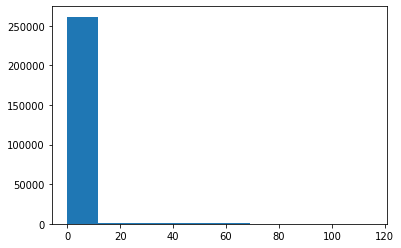

In [0]:
# If we plot histogram for product description it might look like this:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data['product_description_len'])
plt.show()

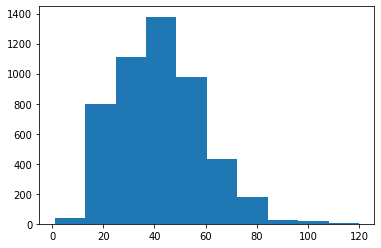

In [0]:
# Since there are empty strings we will see the same distributions without empty strings to identify the outliers
%matplotlib inline
plt.hist(data['product_description_len'],range=(1,120))
plt.show()

# Dealing outliers in meta_description and description

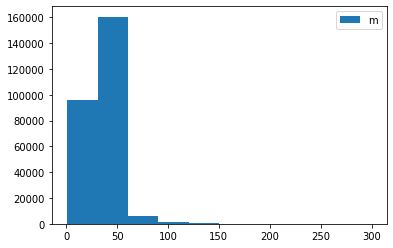

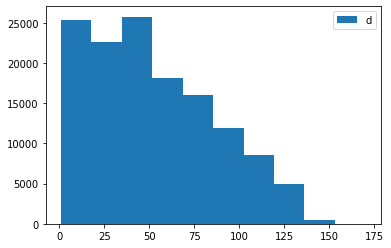

In [0]:
# If you plot histogram for meta_description and description it looks as follows:
plt.hist(data['meta_description'].apply(lambda x: len(x.split())),range=(1,300))
plt.legend("meta_description")
plt.show()

plt.hist(data['description'].apply(lambda x: len(x.split())),range=(1,170))
plt.legend("description")
plt.show()

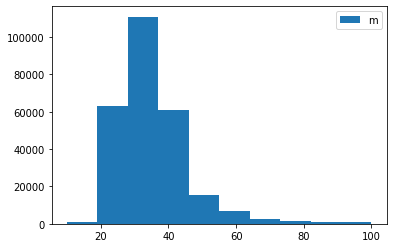

In [0]:
# If you plot histogram for meta_description and description it looks as follows:
plt.hist(data['meta_description'].apply(lambda x: len(x.split())),range=(10,100))
plt.legend("meta_description")
plt.show()

In [0]:
# From above histogram we can see that there are some outliers present  with respect to meta_description 
# Hence we need to remove them
data['len_meta_desc'] = data['meta_description'].apply(lambda x: len(x.split()))
data = data[data['len_meta_desc']<100]
data = data[data['len_meta_desc']>10]

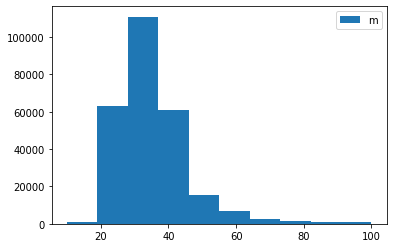

In [0]:
plt.hist(data['meta_description'].apply(lambda x: len(x.split())),range=(10,100))
plt.legend("meta_description")
plt.show()

# Dealing outliers in bread_crumb

In [0]:
data.head(4)

,product_description,meta_description,description,bread_crumb,highlights,formated_reviews,product_description_len,len_meta_desc
0,,"Buy Moto G5s (Lunar Gray, 32 GB) online at bes...",,Home > Mobiles & Accessories > Mobiles > Motor...,[],"[Nice Good but over priced, Absolute rubbish! ...",0,52
1,,Buy Imported ShengShow Gold Mirror Rubik Magic...,Very Good Fantastic Product. No compromise on ...,Home > Toys > Puzzles & Board Games > Puzzles ...,[],"[Really Nice Smooth, Excellent It is a good pr...",0,43
2,A revolutionary camera that adapts like the hu...,"Buy Samsung Galaxy S9 (Midnight Black, 128 GB)...",Galaxy S9 Sleek and stunning the latest flagsh...,Home > Mobiles & Accessories > Mobiles > Samsu...,[],"[Must buy! Just woww, Fakruddin Nice Product, ...",77,53
3,"The Samsung Galaxy J6 is here, with its virtua...","Buy Samsung Galaxy J6 (Black, 32 GB) online at...",,Home > Mobiles & Accessories > Mobiles > Samsu...,[],[Horrible not updated as comptiters Mi and ass...,47,52


In [0]:
# What is bread_crumb?
# It might look like as following:
#       0.  >.    1.     >.   2
#.     Home > Electronics > Phones > iphoneX
#      Home > Furniture  > Chair > Office chair
#.     Home > Beuty > Lipstick
#.     Home 
# It will help us to identify category of a particular product /page
# We will just use 2nd level of category

In [0]:
data['bread_crumb'] = data['bread_crumb'].apply(lambda x: x.split(">")[1] if len(x.split(">"))>=2 else '')

In [0]:
data.head(2)

,product_description,meta_description,description,bread_crumb,highlights,formated_reviews,product_description_len,len_meta_desc
0,,"Buy Moto G5s (Lunar Gray, 32 GB) online at bes...",,Mobiles & Accessories,[],"[Nice Good but over priced, Absolute rubbish! ...",0,52
1,,Buy Imported ShengShow Gold Mirror Rubik Magic...,Very Good Fantastic Product. No compromise on ...,Toys,[],"[Really Nice Smooth, Excellent It is a good pr...",0,43


In [0]:
# since bread_crumb is a categorical variable we might not need to check for any outlier
# But there might be a chance of category imbalance that need to be deal with --> removing irrelevant data

# Dealing outliers in highlights

In [0]:
# Since highlights are manually created we might not need to find any ouliers in that. 

# Dealing outliers in reviews

In [0]:
data.head(2)

,product_description,meta_description,description,bread_crumb,highlights,formated_reviews,product_description_len,len_meta_desc
0,,"Buy Moto G5s (Lunar Gray, 32 GB) online at bes...",,Mobiles & Accessories,[],"[Nice Good but over priced, Absolute rubbish! ...",0,52
1,,Buy Imported ShengShow Gold Mirror Rubik Magic...,Very Good Fantastic Product. No compromise on ...,Toys,[],"[Really Nice Smooth, Excellent It is a good pr...",0,43


In [0]:
# Let's take all reviews in a list
all_reviews = list(data.iloc[:]['formated_reviews'])

In [0]:
#[['review1','review2'],  ['review3','review4'] ] -- >['review1','review2','review3','review4']

In [0]:
# 'all_reviews' is list of list --> we need to convert it to a single list
all_reviews = [item for sublist in all_reviews for item in sublist]

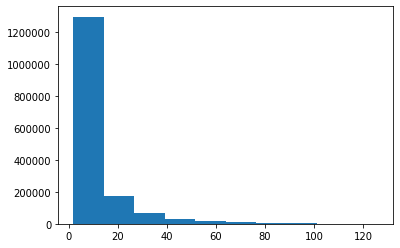

In [0]:
lens_of_reviews = [len(x.split()) for x in all_reviews]
plt.hist(lens_of_reviews)
plt.show()

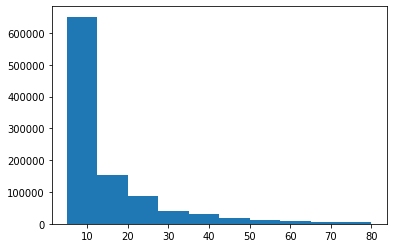

In [0]:
plt.hist(lens_of_reviews, range=(5,80))
plt.show()

In [0]:
# removing outliers from reviews >=5 and <80
data['formated_reviews'] = data['formated_reviews'].apply(lambda x: [rev for rev in x if (len(rev.split())>5) | (len(rev.split())<80)])

In [0]:
data.head(2)

,product_description,meta_description,description,bread_crumb,highlights,formated_reviews,product_description_len,len_meta_desc
0,,"Buy Moto G5s (Lunar Gray, 32 GB) online at bes...",,Mobiles & Accessories,[],"[Nice Good but over priced, Absolute rubbish! ...",0,52
1,,Buy Imported ShengShow Gold Mirror Rubik Magic...,Very Good Fantastic Product. No compromise on ...,Toys,[],"[Really Nice Smooth, Excellent It is a good pr...",0,43


# Missing Data

In [0]:
data.head(2)

,product_description,meta_description,description,bread_crumb,highlights,formated_reviews,product_description_len,len_meta_desc
0,,"Buy Moto G5s (Lunar Gray, 32 GB) online at bes...",,Mobiles & Accessories,[],"[Nice Good but over priced, Absolute rubbish! ...",0,52
1,,Buy Imported ShengShow Gold Mirror Rubik Magic...,Very Good Fantastic Product. No compromise on ...,Toys,[],"[Really Nice Smooth, Excellent It is a good pr...",0,43


In [0]:
# we no need to deal with missing data in this problem statement because we are interested in Nouns
# which can be possible candidates for product attributes. Since empty string do not contribute to Noun 
# we need not to deal with missing data here

In [0]:
# If i am trying to solve it as a classification problem
# I would combine all 3 features and use it as a single feature
X = data['product_description']+" "+data['meta_description']+" "+data["description"]
y = data['bread_crumb']

In [0]:
X[0]

' Buy Moto G5s (Lunar Gray, 32 GB) online at best price with offers in India. Motorola Moto G5s features and specifications include 4 GB RAM,  32 GB ROM, 3000 mAh battery, 16 MP back camera and 5 MP front camera. Compare Motorola Moto G5s by price and performance to shop at Flipkart '

In [0]:
y[0]

' Mobiles & Accessories '

In [0]:
# Even if we had empty string in any one of the column it will be componsated by 2 other columns
# We might need to drop such rows where all three columns are empty

# Handling different types of Data

In [0]:
data.head(2)

,product_description,meta_description,description,bread_crumb,highlights,formated_reviews,product_description_len,len_meta_desc
0,,"Buy Moto G5s (Lunar Gray, 32 GB) online at bes...",,Mobiles & Accessories,[],"[Nice Good but over priced, Absolute rubbish! ...",0,52
1,,Buy Imported ShengShow Gold Mirror Rubik Magic...,Very Good Fantastic Product. No compromise on ...,Toys,[],"[Really Nice Smooth, Excellent It is a good pr...",0,43


In [0]:
del data['product_description_len']
del data['len_meta_desc']

In [0]:
data.head(2)

,product_description,meta_description,description,bread_crumb,highlights,formated_reviews
0,,"Buy Moto G5s (Lunar Gray, 32 GB) online at bes...",,Mobiles & Accessories,[],"[Nice Good but over priced, Absolute rubbish! ..."
1,,Buy Imported ShengShow Gold Mirror Rubik Magic...,Very Good Fantastic Product. No compromise on ...,Toys,[],"[Really Nice Smooth, Excellent It is a good pr..."


In [0]:
# Since highlights and formatted_revies column have list type we might need to convert them to string
# ['a','b','c'] --> a.b.c
# use join function '.'.join(['a','b','c'] )
data['highlights'] = data['highlights'].apply(lambda x: '. '.join(x) )
data['formated_reviews'] = data['formated_reviews'].apply(lambda x: '. '.join(x) )

In [0]:
data.head(2)

,product_description,meta_description,description,bread_crumb,highlights,formated_reviews
0,,"Buy Moto G5s (Lunar Gray, 32 GB) online at bes...",,Mobiles & Accessories,,Nice Good but over priced. Absolute rubbish! V...
1,,Buy Imported ShengShow Gold Mirror Rubik Magic...,Very Good Fantastic Product. No compromise on ...,Toys,,Really Nice Smooth. Excellent It is a good pro...


In [0]:
print("Type of column ***product_description** ",type(data.iloc[43]['product_description']))
print("Type of column ***meta_description**    ",type(data.iloc[43]['meta_description']))
print("Type of column ***description**         ",type(data.iloc[43]['description']))
print("Type of column ***bread_crumb**         ",type(data.iloc[43]['bread_crumb']))
print("Type of column ***highlights**          ",type(data.iloc[43]['highlights']))
print("Type of column ***formated_reviews**    ",type(data.iloc[43]['formated_reviews']))

Type of column ***product_description**  <class 'str'>
Type of column ***meta_description**     <class 'str'>
Type of column ***description**          <class 'str'>
Type of column ***bread_crumb**          <class 'str'>
Type of column ***highlights**           <class 'str'>
Type of column ***formated_reviews**     <class 'str'>


# Remove irrelevant data

In [0]:
# balancing category dataset

In [0]:
# 200. reviews. --> "electronics"  --> sample 25. --> random sampling. --> see the distribution get some richer data
# 10. reviews. --> "cloths"
# 12. reviews. --> "furniture"
# 15. reviews. --> "toys"
# 20. reviews. --> "automobile"

In [0]:
# Remove non english sentences
# Remove irrelevant data from different categories to make data balanced
# you might need to define your own set of defications for irrelevant data with respect to problem statement

In [0]:
# Remove irrelevant data from different categories to make data balanced

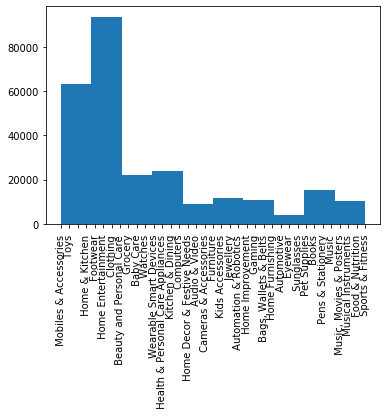

In [0]:
plt.hist(data['bread_crumb'])
plt.xticks(rotation=90)
plt.show()

(array([7.8190e+03, 1.0266e+04, 6.0930e+03, 1.4370e+03, 3.0600e+02,
        2.4000e+01, 8.0000e+00, 8.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([22. , 28.3, 34.6, 40.9, 47.2, 53.5, 59.8, 66.1, 72.4, 78.7, 85. ]),
 <a list of 10 Patch objects>)

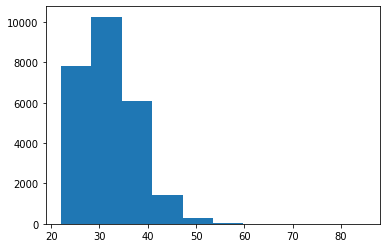

In [0]:
# See distribution
len(data[data['bread_crumb']==" Footwear "])
plt.hist(data[data['bread_crumb']==" Footwear "]['meta_description'].apply(lambda x: len(x.split())))

In [0]:
np.mean(data[data['bread_crumb']==" Footwear "]['meta_description'].apply(lambda x: len(x.split())))

31.360796548802096

In [0]:
# From above figure you can see that some of the categories have higher number of datapoints
# Sampling few RICHER datapoints from such classes would help us to make data balanced

In [0]:
data.head(2)

In [0]:
# We need to sample the pages, not the reviews and good page is the one whose datapoint falls close to the mean in the distribution
# There are two important aspects with respect to page:
#.     1. Seller creates a page and puts usefull information about the product
#.     2. Customer writes the review for that product
# While filtering good pages we might need to rely on the page descriptions rather than reviews
# Hence let's filter out good pages for dominant categories
data['all_desc'] = data['product_description']+". "+data["meta_description"]+". "+data["description"]

In [0]:
res = []
for category in list(set(data['bread_crumb'])):
    temp = data[data['bread_crumb']==category]
    if len(temp)<5000:
        res.append(temp)
    else:
        res.append(temp.sample(5000))

In [0]:
data = pd.concat(res)

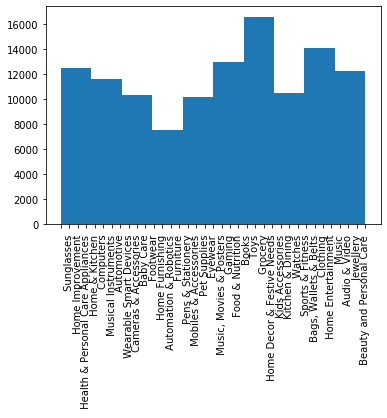

In [0]:
plt.hist(data['bread_crumb'])
plt.xticks(rotation=90)
plt.show()

# Data cleaning

In [0]:
data.head(2)

,product_description,meta_description,description,bread_crumb,highlights,formated_reviews,all_desc
27,,"Buy Samsung Galaxy Grand 2 (Gold, 8 GB) online...",,,,Samsung Galaxy Grand 2 Its a good fone so far....,". Buy Samsung Galaxy Grand 2 (Gold, 8 GB) onli..."
59,,Buy Samsung Metro XL online at best price with...,,,,Nice one Best battery and camera performance !...,. Buy Samsung Metro XL online at best price wi...


In [0]:
import nltk
sen = "this product is very good"
sen.split()
nltk.pos_tag(sen.split())

[('this', 'DT'),
 ('product', 'NN'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('good', 'JJ')]

In [0]:
# you might need to do data cleaning according to your problem statement
# Here we need to find candidates nouns for each page
data['all_data'] = data['product_description']+". "+data["meta_description"]+". "+data["description"]+". "+data["formated_reviews"]

data = data[['all_data']]

In [0]:
data.head(2)

,all_data
27,". Buy Samsung Galaxy Grand 2 (Gold, 8 GB) onli..."
59,. Buy Samsung Metro XL online at best price wi...


In [0]:
import re
re.sub("[^a-zA-Z\- ]"," ","this is my sentence %^@$%!@^$%^!")

'this is my sentence             '

In [0]:
# description, product_description, meta_description, formted_reviews
import nltk
import re
def find_candidate_nouns(text):
    text = text.split(".")
    text=' '.join([' '.join([v[1][0] for v in enumerate(nltk.pos_tag(t.split())) if v[1][1]=="NN" or v[1][1]=='NNS' or v[1][1]=='NNP']) for t in text if len(t)>4])
    text = text.lower()
    text = re.sub("[^a-zA-Z\- ]"," ",text)
    text = re.sub(" +"," ",text)
    text = text.strip()
    return text


In [0]:
find_candidate_nouns("This shirt has very good material. Texture and style is what makes this brand awesome.")

'shirt material texture style brand awesome'

In [0]:
data.head(2)

,all_data
27,". Buy Samsung Galaxy Grand 2 (Gold, 8 GB) onli..."
59,. Buy Samsung Metro XL online at best price wi...


In [0]:
# data['candidate_nouns'] = data['all_data'].apply(lambda x: find_candidate_nouns(x))

In [0]:
data.to_csv("cleaned_data.csv",index=None)

# Bag of words

In [0]:
data = pd.read_csv("cleaned_data.csv")

In [0]:
data.head(2)

,all_desc,candidate_nouns
0,". Buy Samsung Galaxy Grand 2 (Gold, 8 GB) onli...",buy samsung galaxy grand gold gb online price ...
1,. Buy Samsung Metro XL online at best price wi...,buy samsung metro xl online price offers india...


In [0]:
corpus = list(data['candidate_nouns'])

In [0]:
# Check how many numbers of lines present in your dataset
len(corpus)

118274

In [0]:
# Use tfidf to encode each line
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
doc_Matrix = tfidf.fit_transform(corpus)
feature_names = tfidf.get_feature_names()

In [0]:
# There are 118274 documents and each document is encoded as a vector of 50614 dimension
doc_Matrix.shape

(118274, 78347)

In [0]:
doc_Matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
# the first vector/row present in the above matric represent first document of our corpus
corpus[0][0:10]

# Topic modeling

In [0]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=100, max_iter=50, random_state=0)
nmf.fit(doc_Matrix)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=50,
  n_components=100, random_state=0, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [0]:
feature_names_n = tfidf.get_feature_names()
no_of_words_n=700
nmfTopicList_n = {}
for topic_idx, topic in enumerate(nmf.components_):
    nmfTopicList_n[topic_idx] = "  ".join([feature_names_n[i] for i in topic.argsort()[:-no_of_words_n - 1:-1]])

# Testing

In [0]:
review ="Camera of this phone is very good. Battery does not stay for long."

In [0]:
candidate_test_words = find_candidate_nouns(review)

In [0]:
review_vec = tfidf.transform([candidate_test_words])

In [0]:
review_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [0]:
review_topic_prob = nmf.transform(review_vec)

In [0]:
topic_selected_for_review = review_topic_prob[0].argmax()

In [0]:
print("topic selected : ",topic_selected_for_review)

topic selected :  77


In [0]:
topic_words = nmfTopicList_n[77].split()
candidate_test_words = candidate_test_words.split()

In [0]:
[x for x in candidate_test_words if x in topic_words]

['camera', 'phone', 'battery']

In [0]:
# RAKE --> phrases